In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [49]:
from ucimlrepo import fetch_ucirepo
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets

df = pd.concat([X,y], axis=1)

# metadata
# print(breast_cancer_wisconsin_diagnostic.metadata)
# Diagnosis (M = malignant, B = benign)
  
# variable information 
# print(breast_cancer_wisconsin_diagnostic.variables) 

In [50]:
df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [51]:
benign_df = df[df['Diagnosis'] == 'B']
malignant_df = df[df['Diagnosis'] == 'M']

<function matplotlib.pyplot.show(close=None, block=None)>

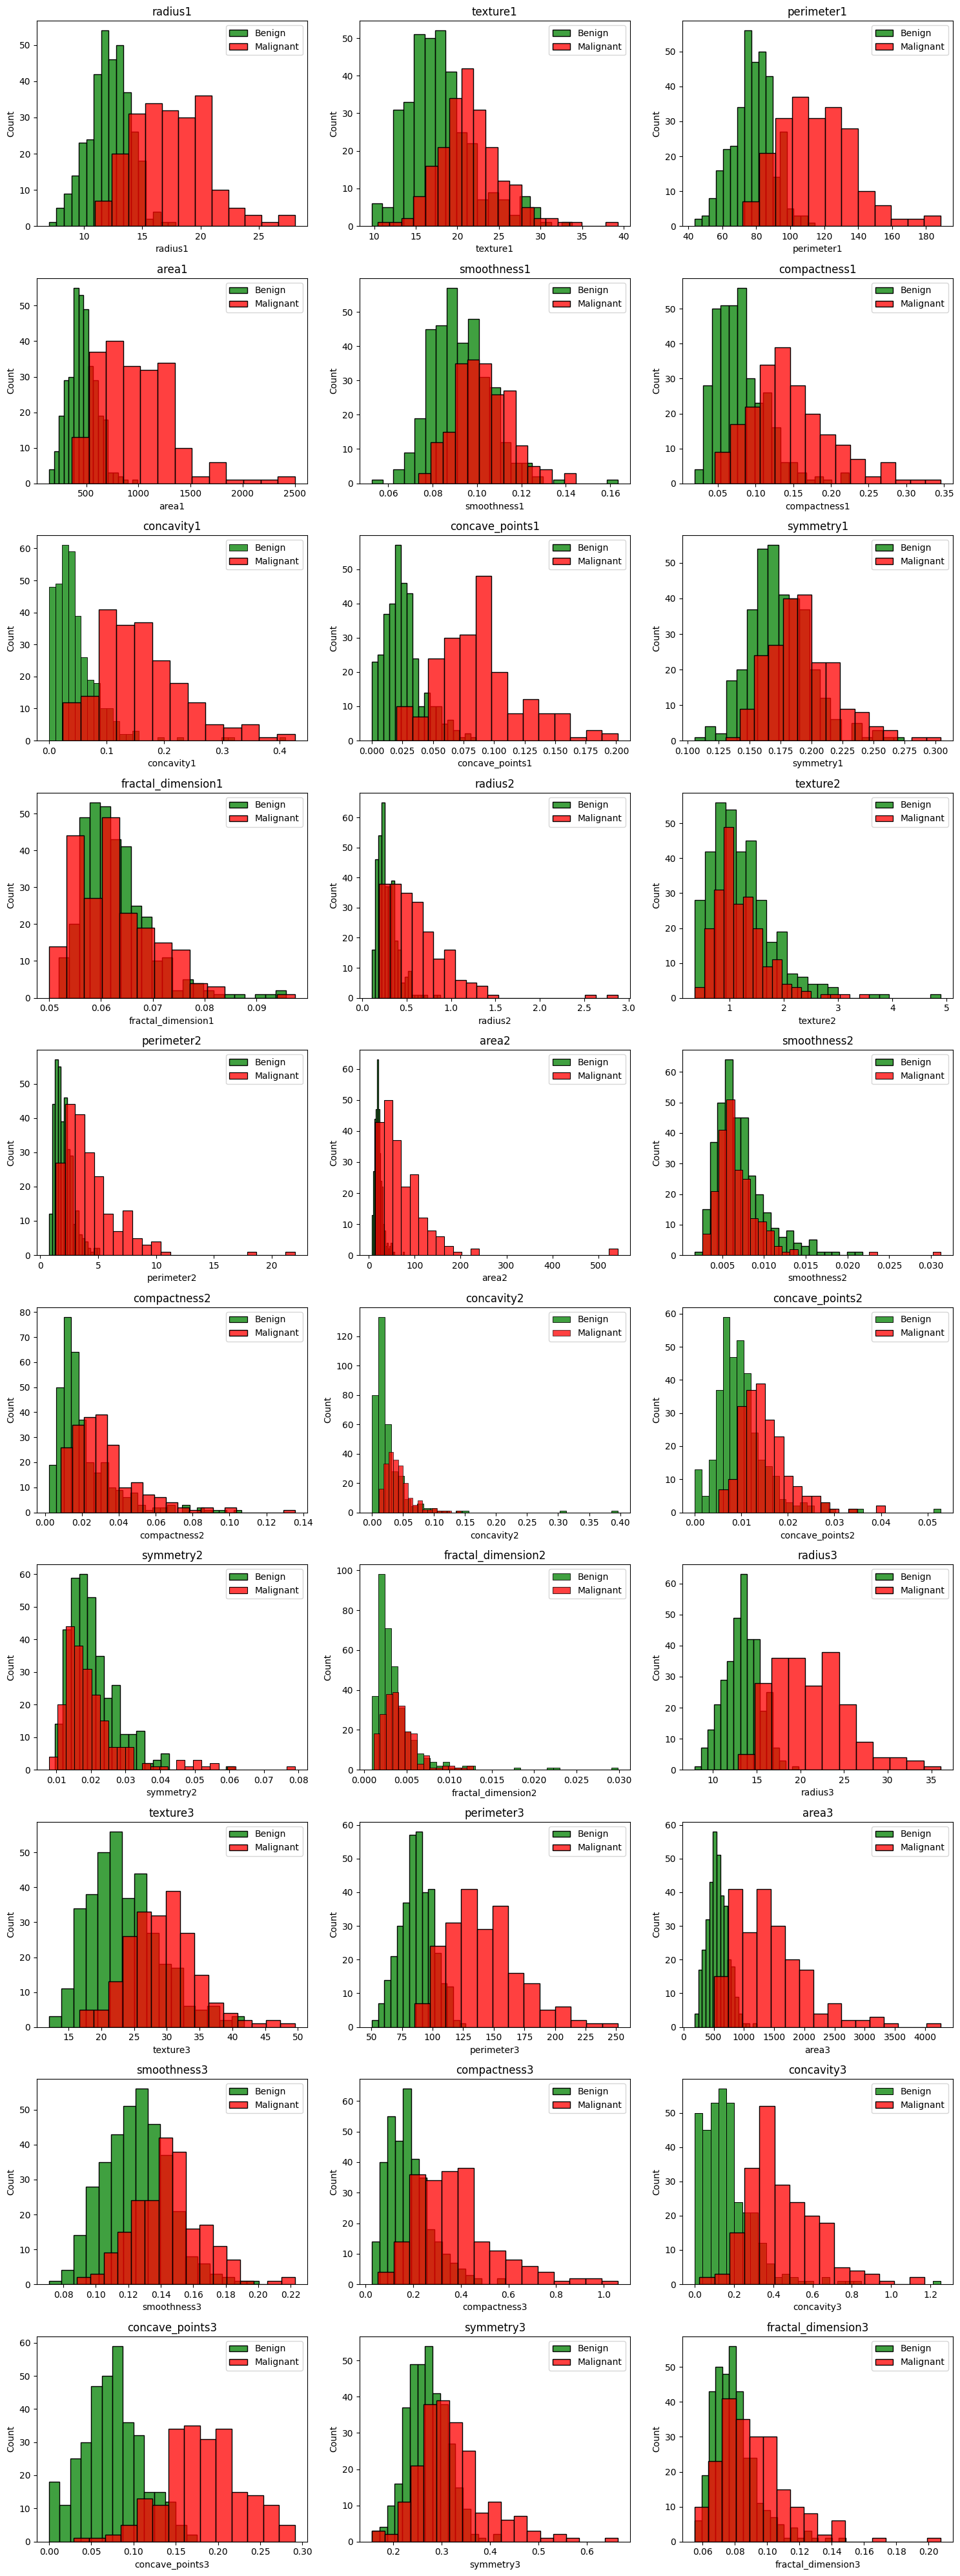

In [54]:
cols = df.columns[:-1]
n_plots = len(cols)

n_rows = math.ceil(n_plots/3)
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4*n_rows))
axes = axes.flatten()

for index, col in enumerate(cols):
    ax = axes[index]
    sns.histplot(data=benign_df[col], color='green', label='Benign', ax=ax)
    sns.histplot(data=malignant_df[col], color='red', label='Malignant', ax=ax)
    ax.set_title(col)
    ax.legend()

for j in range(index+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show